In [119]:
import math
import matplotlib.pyplot as plt
import numpy as np

### Oridinary Differential Equations/Inital Value Problems

It is common to know how a system is changing, but the function that maps the inputs of the system to the output is unknown.  Many times the derivative is such that it cannot be solved analytically (exactly) for a solution and must be computed numerically.  In this case, it is important that the numerical methods used to approximate the analytical solution are stable, converge, and accurate.  

Euler's method provides a way to numerically approximate the solution of a ordinary differential equation.

The general form of forward Euler's method takes the following:

Given $\frac{{dy}}{{dt}} = f\left( {t,y} \right)\hspace{0.1in}y\left( {{t_0}} \right) = {y_0}$

$y_{n+1} = y_n + f(y_n,t_n)(t_{n+1} - t_n)$

with ${t_{n + 1}} - {t_n} = h$

then Euler's Method is:

${y_{n + 1}} = {y_n} + h\,{f_n}$


This is an iterative method that approximates the solution at each time step.  Smaller time steps increase the accuracy of the soltuion but cost more computationally. 

In [120]:
# Constructing an ODE solver for IVPs using Newton's method, returns 1D array of values for ODE

'''Parameters for ode:
    f = first order differentiable function (defined by function(x))
    t0 = left hand boundary
    tn = right hand boundary
    h = step
'''
class ode:
    def __init__(self, f, t0, tn, h):
        self.f = f
        self.t0 = t0
        self.tn = tn
        self.h = h

    ''' Parameters for grid:
        takes no user input parameters, inherits parameters from ode class object
    '''
    def grid(self):
        t = np.linspace(self.t0, self.tn, self.h)
        return t
        
    ''' Paramters for ode_ivp
        inherits class object parameters
        takes user parameters:
        y0 = initial value for ODE
        grd = grib object defined by interval [t0,tn] with step size defined by h
    '''
    def ode_ivp(self, y0, grd):
        y=np.zeros(len(grd))
        y[0] = y0
        for i in range(0,len(grd)-1):
            y[i+1] = y[i] + (grd[i+1]-grd[i])*self.f(y[i])
        return y

Given the first order ODE $y' = 2 - {{\bf{e}}^{ - 4t}} - 2y$ with the intial condition $y(0)=1$

In [121]:
# define function for y'=y
def function(x):
    return x

In [122]:
# ide class object with desired paramters
first = ode(function,0,2,21)

In [123]:
# grid object
stencil = first.grid()

In [124]:
# numerically solved ODE with output returned in 1d array, initial value y(0) = 1
ode1 = first.ode_ivp(1,stencil)

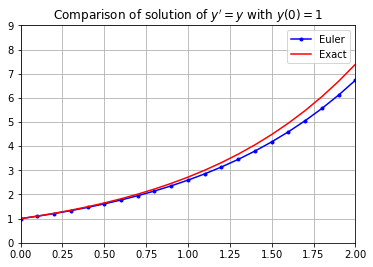

In [125]:
# comparison of exact and numeric solutions
y_exact = np.exp(stencil)
plt.plot(stencil,ode1,'b.-',stencil,y_exact,'r-')
plt.legend(['Euler','Exact'])
plt.axis([0,2,0,9])
plt.grid(True)
plt.title("Comparison of solution of $y'=y$ with $y(0)=1$")
plt.show()
